<a href="https://colab.research.google.com/github/NARAEIM/-/blob/main/n213a_regularized_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 3*

# 📝 Assignment
---

# 🌱 **기본 과제**

이번에는 노트에서 다루지 않은 새로운 데이터인 [Melbourne Housing Market](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market#:~:text=calendar_view_week-,MELBOURNE_HOUSE_PRICES_LESS,-.csv)을 사용하여 정규화를 연습해 보겠습니다.

In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Part 1. Preprocessing**

### **1-1. 데이터 전처리**

- 데이터셋을 불러온 후 전처리를 수행합니다.
  - 모델링을 하기 전에 아래 항목을 drop 해주세요.
    - 특성
      - 날짜 특성
      - 범주형 데이터 중에서 카디널리티가 50이 넘는 특성
    - 행
      - Price 변수 기준 결측치 행
      - 중복되는 행

#### **Q1. 전처리 후 데이터의 shape을 제출하세요.**

In [2]:
# 데이터셋을 불러옵니다. 

import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/melbourne_house_prices/MELBOURNE_HOUSE_PRICES_LESS.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
df['CouncilArea'].value_counts()

Boroondara City Council           5132
Darebin City Council              4182
Banyule City Council              3656
Monash City Council               3592
Bayside City Council              3331
Brimbank City Council             3296
Moreland City Council             3030
Hume City Council                 2939
Glen Eira City Council            2934
Melbourne City Council            2728
Whittlesea City Council           2545
Moonee Valley City Council        2512
Kingston City Council             2378
Manningham City Council           2225
Maribyrnong City Council          2083
Stonnington City Council          1991
Whitehorse City Council           1811
Port Phillip City Council         1771
Yarra City Council                1698
Wyndham City Council              1542
Maroondah City Council            1451
Hobsons Bay City Council          1351
Knox City Council                 1043
Greater Dandenong City Council     948
Frankston City Council             835
Melton City Council      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [6]:
## 이 곳에서 과제를 진행해주세요.

# 날짜 특성 삭제
df= df.drop(columns='Date')
df.shape

(63023, 12)

In [7]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

In [8]:
df.nunique()[df.nunique()>50]

Suburb             380
Address          57754
Price             3417
SellerG            476
Postcode           225
Propertycount      368
Distance           180
dtype: int64

In [9]:
df_clean = df.drop(columns = ['Address', 'SellerG', 'Suburb'])
df_clean.shape

(63023, 9)

In [10]:
# Price열에 있는 결측치행 제거
df_clean = df_clean.dropna(subset=['Price'], axis=0)


In [11]:
# 중복행 제거
df_clean = df_clean.drop_duplicates()
df_clean.shape

(42515, 9)

In [12]:
df_clean['CouncilArea'].value_counts()

Boroondara City Council           3109
Darebin City Council              2831
Banyule City Council              2550
Brimbank City Council             2326
Bayside City Council              2254
Monash City Council               2226
Moreland City Council             2159
Glen Eira City Council            2075
Moonee Valley City Council        1945
Hume City Council                 1936
Kingston City Council             1873
Melbourne City Council            1870
Whittlesea City Council           1615
Manningham City Council           1581
Maribyrnong City Council          1561
Whitehorse City Council           1206
Yarra City Council                1178
Port Phillip City Council         1152
Stonnington City Council          1094
Hobsons Bay City Council           999
Wyndham City Council               927
Maroondah City Council             920
Knox City Council                  682
Frankston City Council             560
Greater Dandenong City Council     542
Melton City Council      

### **1-2. OneHotEncoder**
- 데이터 분리
  - 특성과 타겟을 분리해주세요.
  - `train_test_split()`을 사용하여 전체 데이터를 훈련과 테스트 데이터로 나누어주세요. 
    - 훈련과 테스트 데이터는 8:2의 비로 나눕니다.
    - `random_state=2`로 설정합니다. 
  - `train_test_split()`을 사용하여 훈련 데이터를 훈련과 검증 데이터로 나누어주세요.
    - 훈련과 검증 데이터는 8:2의 비로 나눕니다.
    - `random_state=2`로 설정합니다.
- OneHotEncoder
  - `category_encoders` 라이브러리를 사용해서 원핫인코딩을 수행하세요.

In [13]:
df_clean.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Postcode', 'Regionname',
       'Propertycount', 'Distance', 'CouncilArea'],
      dtype='object')

In [14]:
## 이 곳에서 과제를 진행해주세요.

# 특성과 타겟을 분리
target = 'Price'
features = ['Rooms', 'Type', 'Method', 'Postcode', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea']

In [15]:
# train, test 데이터 나누기 

from sklearn.model_selection import train_test_split

train_sk, test_sk = train_test_split(df_clean, test_size=0.2, random_state=2)
train_sk, val_sk = train_test_split(train_sk, test_size=0.2, random_state=2)

print("train set : ",train_sk.shape)
print("test set : ",test_sk.shape)
print("validation set : ",val_sk.shape)

# X와 y를 나누는 함수를 만들어주겠습니다. 
def x_y_split(df_clean) :
    X = df_clean[features]
    y = df_clean[target]
    return X, y

#각 데이터 세트를 X와 y로 나눠주겠습니다. 
X_train, y_train = x_y_split(train_sk)
X_val, y_val = x_y_split(val_sk)
X_test, y_test = x_y_split(test_sk)

# 데이터가 잘 나눠졌는지 shape을 확인해보겠습니다.
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}, y_val: {y_val.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

train set :  (27209, 9)
test set :  (8503, 9)
validation set :  (6803, 9)
X_train: (27209, 8), y_train: (27209,)
X_val: (6803, 8), y_val: (6803,)
X_test: (8503, 8), y_test: (8503,)


##### **Q2. 훈련/검증/테스트 데이터에 원핫인코딩을 수행한 후 열(column) 개수를 제출하세요.**

In [16]:
# One-Hot encoding을 해주겠습니다.
from category_encoders import OneHotEncoder

ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)
X_val_ohe = ohe.transform(X_val)

In [125]:
X_train_ohe.shape, X_val_ohe.shape, X_test_ohe.shape

((27209, 54), (6803, 54), (8503, 54))

In [18]:
# 문자형 데이터가 없는 것을 확인할 수 있습니다.
(X_train_ohe.dtypes == 'object').sum()

0

## **Part 2. 정규화 모델**

- 여러 회귀 모델을 만들어서 비교해보세요.
  - 모델을 수행하기 전에 **`baseline`**모델을 만들어주세요.
  - 정규화 모델을 학습하기 전에 **`StandardScaler`**를 사용해서 **표준화**를 수행해주세요.
  - **`ols`**, **`ridge`**, **`lasso`** 회귀모델을 아래와 같은 조건에서 만들고 각각의 회귀계수를 확인해보세요.
    - `LinearRegression()`
    - `Ridge(alpha=1)`
    - `Lasso(alpha=1000, tol=1)`

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
warnings.filterwarnings(action='ignore')

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()] * len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 420382.30671549414


In [21]:
# One-Hot encoding을 해주겠습니다.

ohe = OneHotEncoder()

# 인코딩하는 방법을 눈여겨 보세요.

X_train_std = ohe.fit_transform(X_train)
X_test_std = ohe.transform(X_test)
X_val_std = ohe.transform(X_val)


scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_std)
X_test_std = scaler.transform(X_test_std)
X_val_std = scaler.transform(X_val_std)


X_train_std=pd.DataFrame(X_train_std)
X_test_std=pd.DataFrame(X_test_std)
X_val_std=pd.DataFrame(X_val_std)

In [79]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3)
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    mae = mean_absolute_error(y_test, model.predict(X_test))


    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')
    print(f'mae :{mae}')

    return train_score, val_score, test_score, mae

from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장합니다. 
ols = LinearRegression()

# 모델 학습
ols.fit(X_train_std, y_train)

# 성능 비교
ols_train, ols_val, ols_test, ols_mae = print_score(ols,X_train_std, y_train, X_test_std, y_test)

학습 세트 r2_score : 0.579
검증 세트 r2_score : -3.0443006239447644e+21
테스트 세트 r2_score : 0.588
mae :255099.87369523922


In [133]:
ols_coef = ols.coef_


Ridge Regression, alpha=0.01
학습 세트 r2_score : 0.579
검증 세트 r2_score : 0.579
테스트 세트 r2_score : 0.588
mae :255114.3742636196


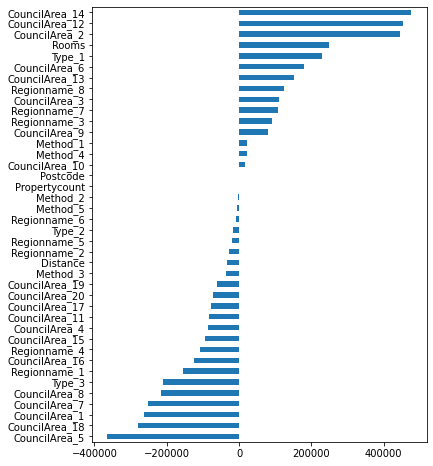

Ridge Regression, alpha=0.1
학습 세트 r2_score : 0.579
검증 세트 r2_score : 0.579
테스트 세트 r2_score : 0.588
mae :255112.3178861584


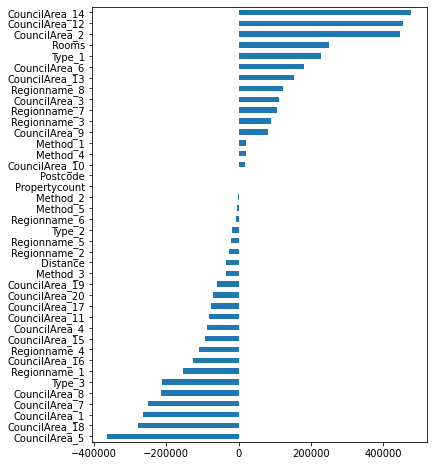

Ridge Regression, alpha=1.0
학습 세트 r2_score : 0.579
검증 세트 r2_score : 0.579
테스트 세트 r2_score : 0.588
mae :255098.98484410896


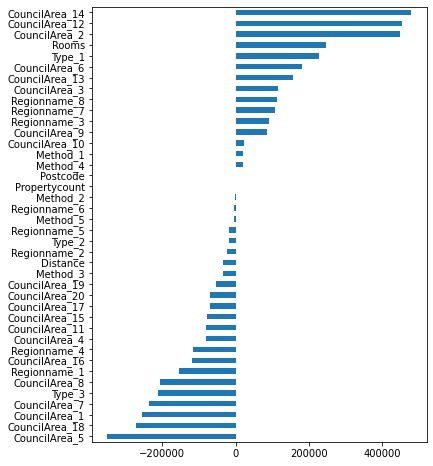

Ridge Regression, alpha=1
학습 세트 r2_score : 0.579
검증 세트 r2_score : 0.579
테스트 세트 r2_score : 0.588
mae :255098.98484410896


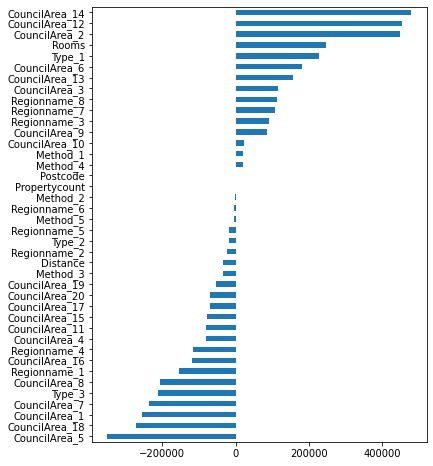

Ridge Regression, alpha=100.0
학습 세트 r2_score : 0.576
검증 세트 r2_score : 0.574
테스트 세트 r2_score : 0.583
mae :255786.22095721168


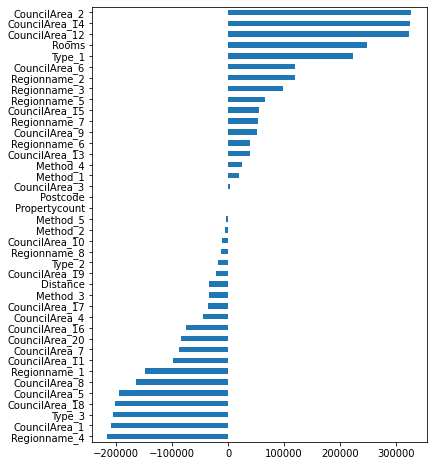

Ridge Regression, alpha=1000.0
학습 세트 r2_score : 0.554
검증 세트 r2_score : 0.546
테스트 세트 r2_score : 0.562
mae :261757.40749880843


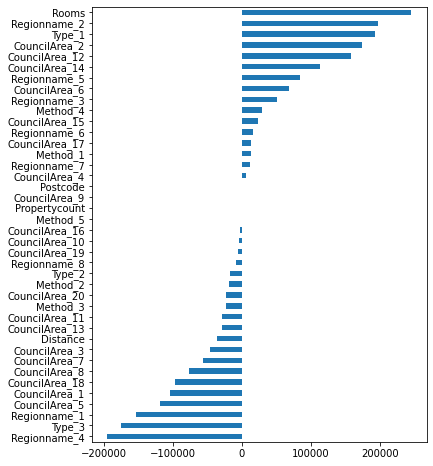

Ridge Regression, alpha=10000.0
학습 세트 r2_score : 0.451
검증 세트 r2_score : 0.415
테스트 세트 r2_score : 0.457
mae :293313.1071331731


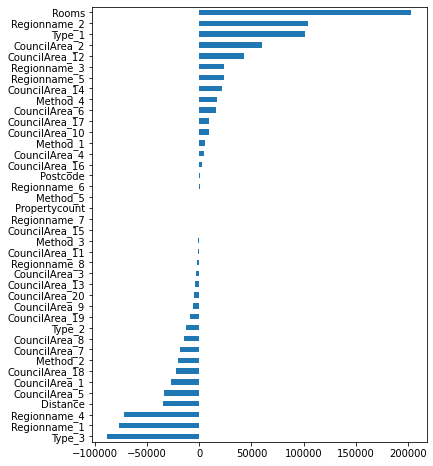

In [111]:
for alpha in [0.01, 0.1, 1.0, 1, 100.0, 1000.0, 10000.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    ridge = Ridge(alpha=alpha)  
    ridge.fit(X_train_ohe, y_train)

    # 성능 확인
    print_score(ridge, X_train_ohe, y_train, X_test_ohe, y_test)

    # plot coefficients
    # 절대값 상위 40개의 회귀계수만 그래프에 나타냈습니다. 
    coefficients = pd.Series(ridge.coef_, X_train_ohe.columns)
    idx = np.abs(coefficients).head(40).index
    plt.figure(figsize=(6, 8))
    coefficients[idx].sort_values().plot.barh()
    plt.show()

In [113]:
from sklearn.linear_model import RidgeCV, LassoCV

# ridgecv로 학습
alphas = np.arange(1, 100, 10)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_ohe, y_train)

print("alpha: ", ridge.alpha_)



alpha:  1


In [107]:
ridge_coef = pd.Series(ridge.coef_, ridge.feature_names_in_)
ridge_coef.sort_values(ascending=False).head(20)


CouncilArea_14    480440.818217
CouncilArea_12    455716.014031
CouncilArea_2     448133.460353
CouncilArea_32    440082.596538
CouncilArea_24    312854.899681
Rooms             248243.205811
CouncilArea_34    228640.120748
Type_1            227718.421859
CouncilArea_6     182740.254731
CouncilArea_31    162837.445467
CouncilArea_13    157518.194270
CouncilArea_3     115006.089557
Regionname_8      114403.196198
CouncilArea_21    111009.652584
Regionname_7      106969.837466
Regionname_3       91133.672133
CouncilArea_9      86699.497711
CouncilArea_33     31683.283623
CouncilArea_30     30687.711740
CouncilArea_10     22200.648957
dtype: float64

In [83]:
# Lasso

"""
패널티값(alpha)이 커질수록 회귀계수가 작아지는 것을 그래프로 확인해보세요.
"""

for alpha in [1000]:
        
    print(f'Lasso Regression, alpha={alpha}')

    # Ridge 모델 학습
    lasso = Lasso(alpha=alpha)  
    lasso.fit(X_train_std, y_train)

    # 성능 확인
    print_score(lasso, X_train_std, y_train, X_test_std, y_test)




Lasso Regression, alpha=1000
학습 세트 r2_score : 0.579
검증 세트 r2_score : 0.579
테스트 세트 r2_score : 0.587
mae :254792.26451453666


In [92]:
lasso_coef = lasso.coef_
lasso_coef = np.abs(lasso_coef)
lasso_coef = np.sort(lasso_coef)
lasso_coef = np.round(lasso_coef, 2)
lasso_coef = pd.Series(lasso.coef_, ridge.feature_names_in_)
lasso_coef[lasso_coef==0].sort_values(ascending=False)

AttributeError: ignored

In [ ]:
# ols, ridge, lasso 비교

eval_compare = pd.DataFrame(index = ['train', 'CV', 'Test'], data = {'OLS':[ols_train, ols_val, ols_test], 'Ridge':[ridge_train, ridge_val, ridge_test], 'Lasso':[lasso_train, lasso_val, lasso_test]})
eval_compare

In [ ]:
compare = pd.concat([ols_coef, ridge_coef, lasso_coef], axis=1)
compare.columns = ['OLS', 'Ridge', 'Lasso']
compare = compare.abs()

In [ ]:
idx = np.abs(compare.OLS).index
compare.loc[idx].sort_values(by='Lasso')

### **2-1. Ridge Regression**

##### **Q3. Ridge 회귀모델의 회귀계수 중 `절댓값이 가장 작은 특성`의 이름과 회귀계수를 ``Abc, 123.45``의 형식으로 제출하세요. (반올림하여 소수점 둘째 자리까지)**

In [ ]:
print(ridge_coef.abs().idxmin(axis=0),',', round(ridge_coef.abs().min(axis=0),2))

### **2-2. Lasso Regression**

##### **Q4. Lasso 회귀모델의 회귀계수 중 0으로 수렴한 특성의 개수를 제출하세요.**

In [ ]:
## 이 곳에서 과제를 진행해주세요.

### **2-3. 일반화 성능 검증**
-  학습한 정규화 모델 중 검증 세트의 **`MAE`**가 가장 낮은 모델을 선택하고 일반화 성능을 확인하세요.
  -  일반화 성능은 **`Test Set`**를 한 번만 사용해서 확인합니다.
  - 일반화 성능 확인 시 평가지표는 **`MAE`**를 사용해주세요.

##### **Q5. 정규화 모델 중 검증 세트의 MAE가 가장 낮은 모델로 일반화 성능을 확인하여 점수를 제출해주세요. (반올림하여 소수점 둘째 자리까지)** 

In [ ]:
## 이 곳에서 과제를 진행해주세요.

# 🥇 **도전 과제**

- RidgeCV와 LassoCV를 사용해서 최적의 알파값을 찾는 과정을 수행하고 성능을 개선해보세요.

- ElasticNet 정규화 모델에 대해서 추가로 학습해보세요. 

- Lasso 와 Ridge에 사용되는 L1, L2 정규화에 대해 알아보고 논의해보세요.
